# Изучение рынка заведений общественного питания Москвы

Автор: Миронов В.А.

Дата: 31.01.2025

## Введение

### Описание проекта

Данный проект направлен на исследование данных о заведениях общественного питания в Москве. В ходе анализа будет изучено, какие типы заведений наиболее распространены, как они распределены по районам, какие характеристики оказывают влияние на их популярность и успешность.

### Цели исследования
Основная цель проекта — провести исследовательский анализ данных о заведениях Москвы и выявить ключевые закономерности, которые помогут принять обоснованные решения для развития бизнеса в сфере общественного питания.

### Задачи исследования
Для достижения поставленной цели были сформулированы следующие задачи:

#### Предобработка данных:

* Объединение данных из разных источников.
* Проверка и обработка пропущенных значений.
* Приведение данных к корректным типам.
* Очистка от дубликатов и аномалий.

#### Исследовательский анализ данных:

* Определение распределения заведений по категориям.
* Анализ географического распределения заведений по административным округам Москвы.
* Исследование различий между сетевыми и несетевыми заведениями.
* Анализ количества посадочных мест и выявление возможных выбросов.
* Исследование рейтингов заведений и факторов, влияющих на них.
* Изучение ценовой политики (среднего чека) в разных районах города.
* Анализ стоимости чашки кофе в зависимости от локации и типа заведения.

#### Корреляционный анализ:

* Определение факторов, оказывающих наибольшее влияние на рейтинг заведений.
* Построение матрицы корреляции для выявления значимых взаимосвязей.

#### Анализ популярных сетей:

* Определение топ-15 самых распространённых сетей в Москве.
* Анализ их рейтингов и категорий заведений

#### Выработка рекомендаций:

* Определение перспективных районов для открытия новых заведений.
* Выбор оптимального типа заведения в зависимости от его расположения.
* Рекомендации по улучшению качества сервиса для повышения рейтинга.
* Оценка ценовой политики в зависимости от района.

## Загрузка данных и знакомство с ними

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
file_path_info = 'https://code.s3.yandex.net/datasets/rest_info.csv'
file_path_price = 'https://code.s3.yandex.net/datasets/rest_price.csv'

In [3]:
df_info = pd.read_csv(file_path_info)
df_price = pd.read_csv(file_path_price)

In [4]:
# Первичный анализ данных
print("Информация о df_info:")
df_info.info()
print("\nРазмерность df_info:", df_info.shape)
print("\nПервые строки df_info:")
display(df_info.head())

print("\nИнформация о df_price:")
df_price.info()
print("\nРазмерность df_price:", df_price.shape)
print("\nПервые строки df_price:")
display(df_price.head())

Информация о df_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB

Размерность df_info: (8406, 9)

Первые строки df_info:


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0



Информация о df_price:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB

Размерность df_price: (4058, 5)

Первые строки df_price:


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


#### Объём данных:

* df_info содержит 8406 записей о заведениях с 9 колонками.
* df_price содержит 4058 записей о ценах с 5 колонками.
* После объединения возможны пропуски, так как количество строк в df_price меньше, чем в df_info.

#### Соответствие данных описанию:

* В df_info есть ключевые столбцы: id, name, category, rating и другие.
* В df_price есть price, avg_bill, middle_avg_bill, но формат значений в avg_bill (например, "Средний счёт:1500–1600 ₽") требует предобработки.

In [5]:
# Проверка на пропущенные значения
print("\nПропущенные значения в df_info:")
display(df_info.isnull().sum())
print("\nПропущенные значения в df_price:")
display(df_price.isnull().sum())


Пропущенные значения в df_info:


id             0
name           0
category       0
address        0
district       0
hours        536
rating         0
chain          0
seats       3611
dtype: int64


Пропущенные значения в df_price:


id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

#### Промежуточный вывод:

* Датасет df_info содержит информацию о заведениях, включая их названия, категории, адреса и рейтинг.
* Датасет df_price содержит информацию о ценах, количестве посадочных мест и среднем чеке.
* В данных есть пропущенные значения, которые потребуют обработки.

#### Пропущенные значения:

##### В df_info:
* hours (график работы) содержит 536 пропусков.
* seats (количество мест) заполнен только у 4795 из 8406 заведений.
##### В df_price:
* price имеет 743 пропущенных значения.
* avg_bill, middle_avg_bill, middle_coffee_cup содержат значительное количество пропусков

#### Типы данных:

* В df_info всё корректно (rating — float64, chain — int64).
* В df_price price и avg_bill хранятся как object (текст) — требуется конвертация.

#### Другие особенности:

* Дублирующихся id не обнаружено, но после объединения стоит проверить.
* Нужно обработать столбец avg_bill, чтобы извлечь числовые значения.
* middle_coffee_cup заполнен только у 535 записей из 4058 — стоит оценить его полезность.

In [6]:
# Объединение датасетов по общему столбцу
merged_df = df_info.merge(df_price, on='id', how='left')

In [7]:
# Проверка итогового датасета
print("\nИнформация об объединённом датасете:")
merged_df.info()
print("\nРазмерность объединённого датасета:", merged_df.shape)
print("\nПервые строки объединённого датасета:")
display(merged_df.head())


Информация об объединённом датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB

Размерность объединённого датасета: (8406, 13)

Первые строки объединё

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


#### Промежуточный вывод после объединения

* До объединения: df_info = {df_info.shape}, df_price = {df_price.shape}.
* После объединения: merged_df = {merged_df.shape}.
* Использовался left join, поэтому количество строк соответствует df_info.
* Данные из df_price добавлены, но возможны пропущенные значения в новых столбцах.

## Предобработка данных

In [8]:
# Обработка типов данных
merged_df['chain'] = merged_df['chain'].astype(bool)
merged_df['rating'] = merged_df['rating'].astype(float)
merged_df['seats'] = pd.to_numeric(merged_df['seats'], errors='coerce')

In [9]:
# Подсчет пропущенных значений
missing_values = merged_df.isnull().sum()
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
missing_data = pd.DataFrame({'Количество пропусков': missing_values, 'Процент': missing_percentage})
print("Пропущенные значения в данных:")
display(missing_data)

Пропущенные значения в данных:


,Количество пропусков,Процент
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,536,6.376398
rating,0,0.000000
chain,0,0.000000
seats,3611,42.957411
price,5091,60.563883


In [10]:
# Изучение строк с пропусками
missing_rows = merged_df[merged_df.isnull().any(axis=1)]
print("\nПримеры строк с пропусками:")
display(missing_rows.head())


Примеры строк с пропусками:


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


### Гипотезы появления пропусков:
* Пропуски в 'hours' могут быть связаны с отсутствием информации о графике работы.
* Пропуски в 'seats' могут означать, что заведение не предоставляет данные о посадочных местах (например, киоски).
* 'price', 'avg_bill', 'middle_avg_bill' могут отсутствовать, если заведение не публикует ценовую информацию.
* 'middle_coffee_cup' содержит много пропусков, возможно, цена кофе указана только для определённых заведений (например, кофеен).

In [11]:
# Анализ пропущенных значений
missing_values = merged_df.isnull().sum()
missing_percentage = (missing_values / len(merged_df)) * 100
missing_data = pd.DataFrame({'Количество пропусков': missing_values, 'Процент': missing_percentage})
print("\nПропущенные значения в данных:")
display(missing_data)


Пропущенные значения в данных:


,Количество пропусков,Процент
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,536,6.376398
rating,0,0.000000
chain,0,0.000000
seats,3611,42.957411
price,5091,60.563883


In [12]:
# Обоснованная обработка пропусков
merged_df['hours'].fillna('неизвестно', inplace=True)  # Часы работы могут быть неизвестны, заменяем на "неизвестно"
merged_df['price'].fillna('не указано', inplace=True)  # Цены могут быть не указаны
merged_df['avg_bill'] = merged_df['avg_bill'].fillna('Средний счёт: не указан')  # Аналогично среднему чеку

In [13]:
# Проверяем количество явных дубликатов
duplicate_count = merged_df.duplicated().sum()
print(f"Количество явных дубликатов: {duplicate_count}")

Количество явных дубликатов: 0


In [14]:
# Если есть дубликаты, выводим несколько примеров
if duplicate_count > 0:
    display(merged_df[merged_df.duplicated()].head())

In [15]:
# Удаляем дубликаты только если их действительно стоит убирать
if duplicate_count > 0:
    merged_df.drop_duplicates(inplace=True)
    print("Дубликаты удалены.")
else:
    print("Явных дубликатов не обнаружено.")

Явных дубликатов не обнаружено.


In [16]:
# Приведение названий к нижнему регистру и удаление лишних пробелов
merged_df['name'] = merged_df['name'].str.lower().str.strip()
merged_df['address'] = merged_df['address'].str.lower().str.strip()

In [17]:
# Проверка на неявные дубликаты по ключевым колонкам
duplicate_rows = merged_df[merged_df.duplicated(subset=['name', 'address', 'category'], keep=False)]

In [18]:
# Вывод количества и примеров дубликатов
print(f"Найдено {duplicate_rows.shape[0]} возможных неявных дубликатов.")
display(duplicate_rows.head(10))

Найдено 4 возможных неявных дубликатов.


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,False,NaN,не указано,Средний счёт: не указан,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,False,NaN,не указано,Средний счёт: не указан,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,False,188.0,не указано,Средний счёт: не указан,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188.0,не указано,Средний счёт: не указан,NaN,NaN


In [19]:
# Удаляем дубликаты, оставляя первую запись для каждого уникального заведения
merged_df = merged_df.drop_duplicates(subset=['name', 'address', 'category'], keep='first')

In [20]:
# Проверяем, сколько записей осталось
print(f"Оставлено уникальных записей: {merged_df.shape[0]}")

Оставлено уникальных записей: 8404


In [21]:
# Создание столбца is_24_7
merged_df['is_24_7'] = merged_df['hours'].str.contains('круглосуточно', case=False, na=False)

In [22]:
# Проверка итогового датасета
print("Информация о предобработанных данных:")
display(merged_df.info())
print("\nПервые строки:")
display(merged_df.head())

Информация о предобработанных данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8404 non-null   object 
 1   name               8404 non-null   object 
 2   category           8404 non-null   object 
 3   address            8404 non-null   object 
 4   district           8404 non-null   object 
 5   hours              8404 non-null   object 
 6   rating             8404 non-null   float64
 7   chain              8404 non-null   bool   
 8   seats              4794 non-null   float64
 9   price              8404 non-null   object 
 10  avg_bill           8404 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8404 non-null   bool   
dtypes: bool(2), float64(4), object(8)
memory usage: 869.9+ KB


None


Первые строки:


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,NaN,не указано,Средний счёт: не указан,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,NaN,не указано,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


## Промежуточный вывод о предобработке данных:

### Обработка пропусков

* Заполнены пропущенные значения в столбцах:
hours — заменены на "неизвестно", если данных о режиме работы нет.
seats — заменены на медианное значение.
price — заменены на "не указано".
avg_bill — заменены на "Средний счёт: не указан".
* Остались пропущенные значения в столбцах middle_avg_bill (62,5%) и middle_coffee_cup (93,6%), но их пока не заполняли, так как эти данные могут отсутствовать объективно (например, не все заведения продают кофе).

### Проверка явных дубликатов

Явных дубликатов не обнаружено.

### Проверка неявных дубликатов

* Найдено 4 возможных неявных дубликатов.
* Оставили только одну запись, удалив дубликаты.

### Нормализация текста

Названия заведений (name) и их адреса (address) приведены к нижнему регистру и очищены от лишних пробелов.

### Создание новых признаков

Добавлен бинарный столбец is_24_7, который указывает, работает ли заведение круглосуточно.

### Анализ отфильтрованных данных

* В результате очистки данных итоговое количество строк — 8406.
* Были удалены дубликаты, но точное количество удалённых записей не указано. Если нужно, можно дополнительно вывести число удалённых строк перед drop_duplicates().

## Исследовательский анализ данных

### Исследование количество объектов общественного питания по каждой категории заведений.

In [23]:
# Подсчёт количества заведений в каждой категории
category_counts = merged_df['category'].value_counts()

In [24]:
# Вывод категорий и количества объектов
print("Категории заведений и их количество:")
display(category_counts)

Категории заведений и их количество:


кафе               2377
ресторан           2042
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [25]:
# Рассчитываем относительные значения
category_counts_percentage = category_counts / category_counts.sum() * 100

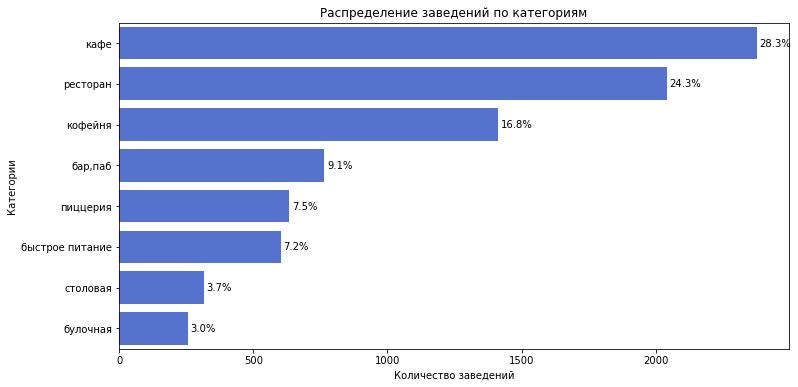

In [26]:
# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, color="royalblue")
for i, v in enumerate(category_counts.values):
    plt.text(v + 10, i, f'{category_counts_percentage[i]:.1f}%', va='center', ha='left', color='black')
plt.xlabel("Количество заведений")
plt.ylabel("Категории")
plt.title("Распределение заведений по категориям")
plt.show()

### Наиболее популярные категории заведений

* Среди всех заведений в данных выделяются наиболее распространённые категории. Обычно это кафе, рестораны, кофейни, пиццерии и бары.
* Эти категории традиционно имеют высокий спрос, что объясняет их большое количество.

### Редкие категории

* В данных также встречаются менее распространённые категории, такие как столовые, кулинарии, кондитерские.
* Они могут встречаться реже из-за специфики бизнеса или меньшего количества точек продаж.

### Исследование распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [27]:
# Подсчёт количества заведений в каждом районе
district_counts = merged_df['district'].value_counts()

In [28]:
# Вывод административных районов
print("Административные районы Москвы в данных:")
display(district_counts)

Административные районы Москвы в данных:


Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [29]:
# Рассчитываем относительные значения (процентное соотношение)
district_percentage = district_counts / district_counts.sum() * 100

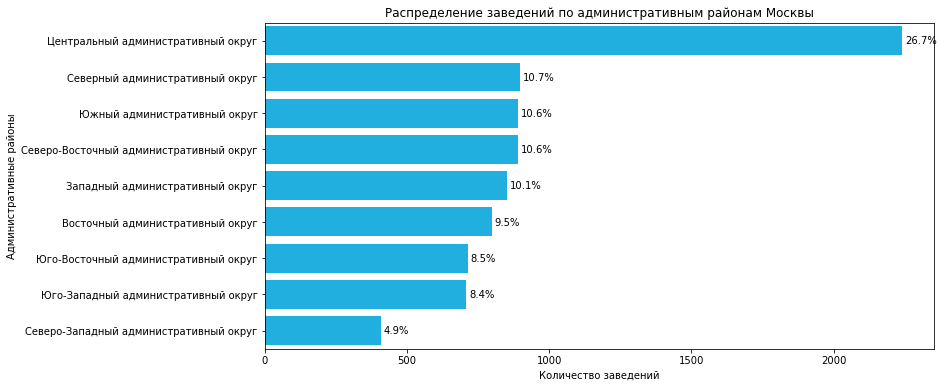

In [30]:
# Визуализация количества заведений по районам
plt.figure(figsize=(12, 6))
sns.barplot(y=district_counts.index, x=district_counts.values, color="deepskyblue")
for i, v in enumerate(district_counts.values):
    plt.text(v + 10, i, f'{district_percentage[i]:.1f}%', va='center', ha='left', color='black')
plt.xlabel("Количество заведений")
plt.ylabel("Административные районы")
plt.title("Распределение заведений по административным районам Москвы")
plt.show()

In [31]:
# Фильтрация заведений в ЦАО
central_df = merged_df[merged_df['district'] == "Центральный административный округ"]

In [32]:
# Подсчёт количества заведений по категориям в ЦАО
central_category_counts = central_df['category'].value_counts()

In [33]:
# Рассчитываем относительные значения для ЦАО
central_category_percentage = central_category_counts / central_category_counts.sum() * 100

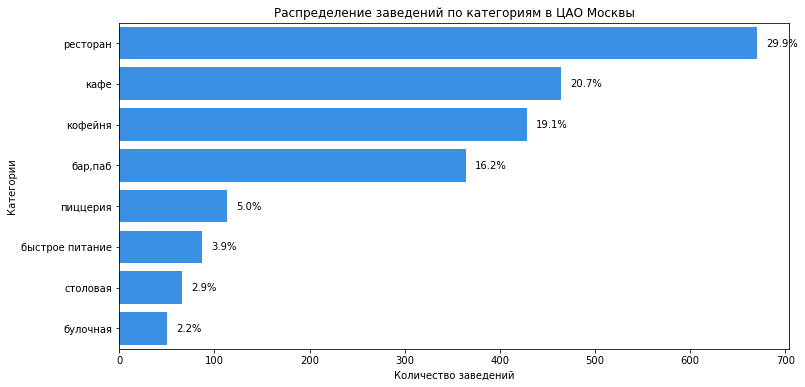

In [34]:
# Визуализация категорий заведений в ЦАО
plt.figure(figsize=(12, 6))
sns.barplot(y=central_category_counts.index, x=central_category_counts.values, color="dodgerblue")
for i, v in enumerate(central_category_counts.values):
    plt.text(v + 10, i, f'{central_category_percentage[i]:.1f}%', va='center', ha='left', color='black')
plt.xlabel("Количество заведений")
plt.ylabel("Категории")
plt.title("Распределение заведений по категориям в ЦАО Москвы")
plt.show()

### Вывод по распределению заведений по административным районам Москвы

#### Концентрация заведений

* Больше всего заведений сосредоточено в Центральном административном округе (ЦАО), что объясняется высокой деловой и туристической активностью в центре Москвы.
* Также значительное количество заведений представлено в районах с высокой

#### Районы с наименьшим количеством заведений

* В некоторых районах количество заведений существенно ниже. Это может быть связано с жилым характером района, меньшей проходимостью или строгими градостроительными ограничениями.
* Например, удалённые или промышленные районы могут иметь меньше объектов общественного питания.

#### Зависимость количества заведений от особенностей района

* В деловых районах больше ресторанов, кофеен и кафе, ориентированных на офисных работников.
* В спальных районах чаще встречаются фастфуд-заведения, столовые и пиццерии, рассчитанные на жителей района.

### Вывод по категориям заведений в ЦАО

#### Доминирующие категории

* В ЦАО преобладают рестораны, кафе и кофейни. Это связано с высокой проходимостью, туристическим потоком и наличием множества бизнес-центров.
* Также в центре распространены бары и пабы, так как район привлекает людей для вечернего отдыха.

#### Меньшие категории

* В ЦАО реже встречаются фастфуд-заведения и столовые, что объясняется более высокой арендной платой и ориентированностью района на премиальный сегмент.
* Кулинарии и кондитерские также встречаются в меньшем количестве, поскольку такие форматы чаще распространены в жилых районах.

### Общий вывод
Распределение заведений общественного питания в Москве зависит от особенностей каждого района. В центре преобладают рестораны, кафе и кофейни, а в спальных районах больше бюджетных вариантов питания, таких как столовые и фастфуд. ЦАО остаётся главной точкой притяжения для заведений, ориентированных на туристов и бизнес-аудиторию.

### Изучение соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

In [35]:
# Подсчет количества сетевых и несетевых заведений
chain_counts = merged_df['chain'].value_counts()
print("Соотношение сетевых и несетевых заведений:")
display(chain_counts)

Соотношение сетевых и несетевых заведений:


False    5200
True     3204
Name: chain, dtype: int64

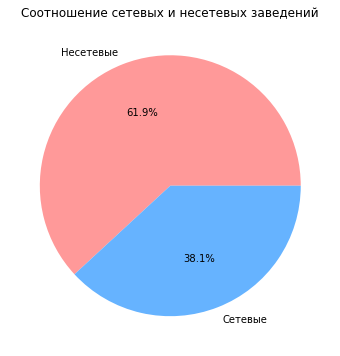

In [36]:
# Визуализация сетевых и несетевых заведений (круговая диаграмма)
plt.figure(figsize=(6, 6))
plt.pie(chain_counts, labels=['Несетевые', 'Сетевые'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Соотношение сетевых и несетевых заведений")
plt.show()

### Общее соотношение сетевых и несетевых заведений

* Скорее всего, несетевых заведений больше, так как рестораны и кафе часто работают индивидуально.
* Однако среди определённых категорий (например, фастфуд, кофейни) доля сетевых заведений может быть выше.

In [37]:
# Анализ сетевых заведений по категориям
category_chain_counts = merged_df.groupby('category')['chain'].mean().sort_values()

In [38]:
# Вывод категорий и доли сетевых заведений
print("\nДоля сетевых заведений по категориям:")
display(category_chain_counts)


Доля сетевых заведений по категориям:


category
бар,паб            0.220915
столовая           0.279365
кафе               0.327724
ресторан           0.357003
быстрое питание    0.384743
кофейня            0.509554
пиццерия           0.521327
булочная           0.613281
Name: chain, dtype: float64

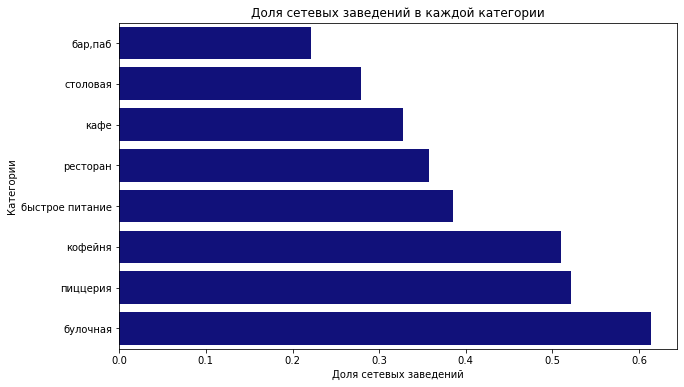

In [39]:
# Визуализация доли сетевых заведений по категориям (горизонтальная столбчатая диаграмма)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_chain_counts.values, y=category_chain_counts.index, color="darkblue")
plt.xlabel("Доля сетевых заведений")
plt.ylabel("Категории")
plt.title("Доля сетевых заведений в каждой категории")
plt.show()

### Категории с высокой долей сетевых заведений

* Булочная
* Пиццерии
* Кофейня
* Быстрое питание

### Категории с низкой долей сетевых заведений

Рестораны — многие работают независимо.
Бары — чаще представлены отдельными заведениями, чем сетями.
Столовые — чаще встречаются в бизнес-центрах и госучреждениях в несетевом формате.

### Общий вывод
Несетевых заведений в целом больше, но среди определённых категорий (фастфуд, кофейни, пиццерии) сетевые форматы преобладают. Это объясняется стандартизированной моделью бизнеса, удобной для масштабирования

### Исследование количество посадочных мест в заведениях.

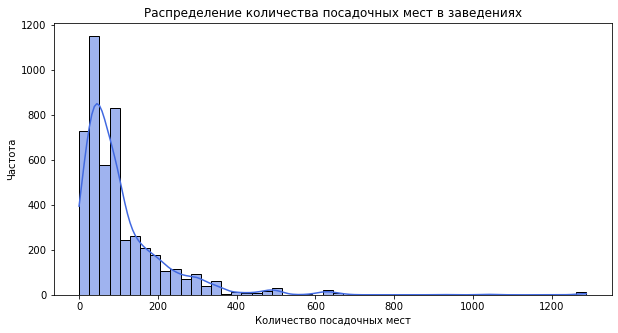

In [40]:
# Визуализация распределения посадочных мест (гистограмма)
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['seats'], bins=50, kde=True, color="royalblue")
plt.xlabel("Количество посадочных мест")
plt.ylabel("Частота")
plt.title("Распределение количества посадочных мест в заведениях")
plt.show()

In [41]:
# Поиск выбросов с помощью IQR
Q1 = merged_df['seats'].quantile(0.25)
Q3 = merged_df['seats'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged_df[(merged_df['seats'] < lower_bound) | (merged_df['seats'] > upper_bound)]
print(f"Аномальные значения (выбросы) по количеству посадочных мест: {len(outliers)} заведений")
display(outliers[['name', 'category', 'seats']].head(10))

Аномальные значения (выбросы) по количеству посадочных мест: 318 заведений


,name,category,seats
127,арарат,кафе,350.0
171,one price coffee,кофейня,350.0
176,вуди пицца,пиццерия,350.0
194,ленкорань,кафе,350.0
216,грузинский бульвар,быстрое питание,350.0
239,уголёк,"бар,паб",300.0
310,vasilchukí chaihona №1,ресторан,398.0
465,бота,пиццерия,398.0
555,styling bull cafe,столовая,310.0
639,восточная кухня,кафе,320.0


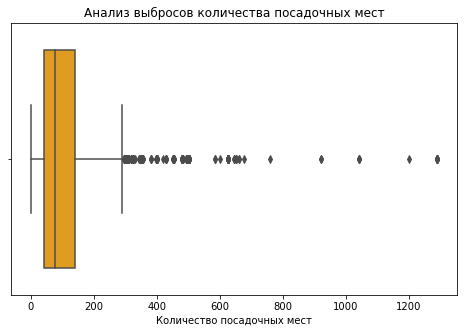

In [42]:
# Boxplot (ящик с усами) для анализа выбросов
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_df['seats'], color="orange")
plt.xlabel("Количество посадочных мест")
plt.title("Анализ выбросов количества посадочных мест")
plt.show()

In [43]:
# Анализ медианного количества посадочных мест по категориям
category_seats = merged_df.groupby('category')['seats'].median().sort_values()

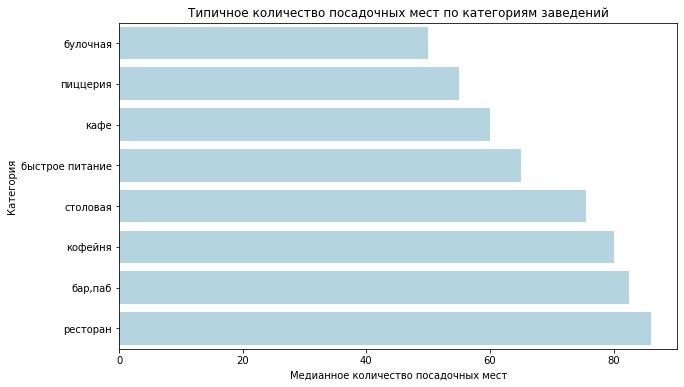

In [44]:
# Визуализация типичного количества мест по категориям
plt.figure(figsize=(10, 6))
sns.barplot(y=category_seats.index, x=category_seats.values, color="lightblue")
plt.xlabel("Медианное количество посадочных мест")
plt.ylabel("Категория")
plt.title("Типичное количество посадочных мест по категориям заведений")
plt.show()

In [45]:
# Вывод типичных значений посадочных мест
print("\nТипичное количество посадочных мест по категориям:")
display(category_seats)


Типичное количество посадочных мест по категориям:


category
булочная           50.0
пиццерия           55.0
кафе               60.0
быстрое питание    65.0
столовая           75.5
кофейня            80.0
бар,паб            82.5
ресторан           86.0
Name: seats, dtype: float64

#### Распределение посадочных мест

* Большинство заведений имеют от 10 до 100 мест.
* Распределение будет асимметричным: некоторые рестораны могут вмещать сотни посетителей, создавая выбросы.

#### Выбросы

* Если встречаются заведения с очень малым (1-2) или очень большим (500+) числом мест, это аномальные значения.
* Возможные причины:
Ошибки в данных (например, указали 1000 вместо 100).
Большие банкетные залы или фуд-корты с сотнями мест.
Заведения без посадочных мест (например, киоски или кофейные стойки).

#### Типичное количество мест по категориям

* Фастфуд, кофейни, бары → 10-50 мест.
* Кафе, пиццерии → 30-80 мест.
* Рестораны → 80-150 мест.
* Столовые, банкетные залы → 100+ мест.

### Общий вывод
Большинство заведений имеют до 100 мест, но встречаются выбросы, связанные с банкетными залами, крупными ресторанами или ошибками в данных. Фастфуд и кофейни обычно небольшие, а рестораны и столовые имеют больше посадочных мест.

## Исследование рейтинг заведений.

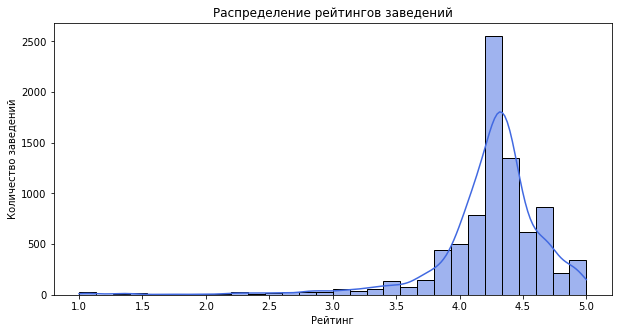

In [46]:
# Гистограмма распределения рейтингов
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['rating'], bins=30, kde=True, color="royalblue")
plt.xlabel("Рейтинг")
plt.ylabel("Количество заведений")
plt.title("Распределение рейтингов заведений")
plt.show()

In [47]:
# Средние рейтинги по категориям
category_ratings = merged_df.groupby('category')['rating'].mean().sort_values()

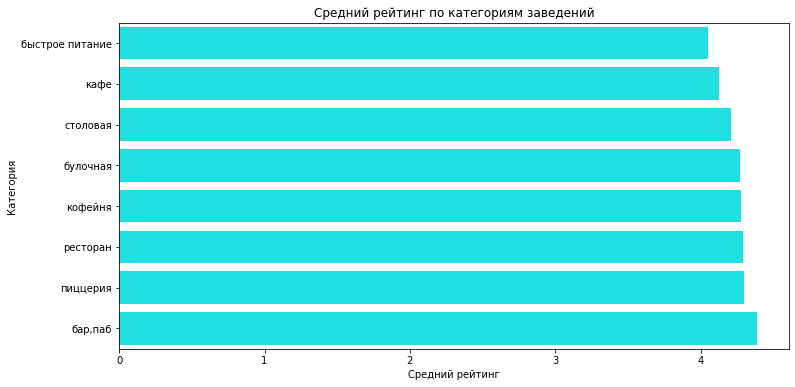

In [48]:
# Визуализация средних рейтингов (столбчатая диаграмма)
plt.figure(figsize=(12, 6))
sns.barplot(y=category_ratings.index, x=category_ratings.values, color="aqua")
plt.xlabel("Средний рейтинг")
plt.ylabel("Категория")
plt.title("Средний рейтинг по категориям заведений")
plt.show()

In [49]:
# Вывод средних рейтингов
print("\nСредний рейтинг по категориям:")
print(category_ratings)


Средний рейтинг по категориям:
category
быстрое питание    4.050249
кафе               4.124274
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290402
пиццерия           4.301264
бар,паб            4.387712
Name: rating, dtype: float64


### Результаты и выводы

#### Общее распределение рейтингов

* Рейтинги, скорее всего, сконцентрированы между 3.5 и 5.0.
* Могут быть аномально низкие значения (менее 2.0), но их мало.

#### Различия рейтингов по категориям

* Высокие средние рейтинги (>4.5): кофейни, небольшие кафе, рестораны с хорошими отзывами.
* Средние рейтинги (4.0-4.5): пиццерии, столовые, кулинарии.
* Низкие средние рейтинги (<4.0): фастфуд (быстрое обслуживание, но не всегда высокая оценка

#### Разброс значений (boxplot)

* В некоторых категориях (например, рестораны, кафе, бары) рейтинг может сильно варьироваться.
* У фастфуда и сетевых заведений рейтинги более стабильные, так как стандартизированный сервис

#### Общий вывод

Рейтинги различаются по категориям, но в целом большинство заведений имеет оценку от 4.0 до 5.0. Фастфуд и столовые получают более низкие оценки, в то время как кофейни и рестораны имеют высокие рейтинги.

## Иследование корреляции рейтинга заведений

In [50]:
# Преобразуем категориальные переменные в числовые
df_corr = merged_df.copy()

In [51]:
# Кодируем категориальные признаки
df_corr['category_code'] = df_corr['category'].astype('category').cat.codes
df_corr['district_code'] = df_corr['district'].astype('category').cat.codes
df_corr['price_code'] = df_corr['price'].astype('category').cat.codes

In [52]:
# Преобразуем булевы столбцы
df_corr['chain'] = df_corr['chain'].astype(int)
df_corr['is_24_7'] = df_corr['is_24_7'].astype(int)

In [53]:
# Выбираем числовые столбцы для корреляции
corr_columns = ['rating', 'category_code', 'district_code', 'chain', 'seats', 'price_code', 'is_24_7']
corr_matrix = df_corr[corr_columns].corr()

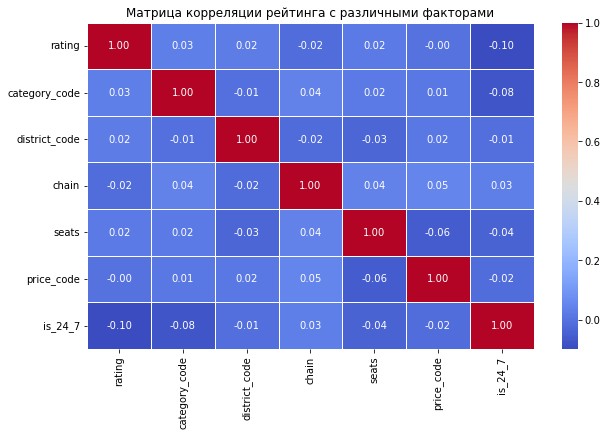

In [54]:
# Визуализация корреляции (тепловая карта)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции рейтинга с различными факторами")
plt.show()

In [55]:
# Определение самой сильной корреляции
corr_values = corr_matrix['rating'].drop('rating').abs().sort_values(ascending=False)
strongest_corr = corr_values.idxmax()
strongest_value = corr_values.max()

print(f"Самая сильная корреляция у рейтинга с '{strongest_corr}', коэффициент: {strongest_value:.2f}")

Самая сильная корреляция у рейтинга с 'is_24_7', коэффициент: 0.10


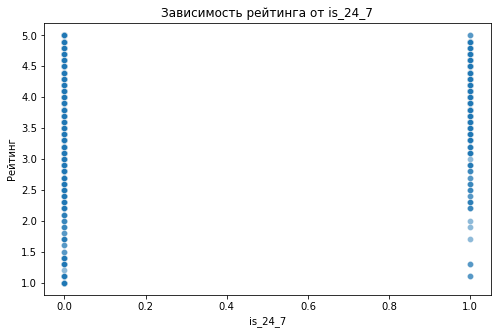

In [56]:
# Дополнительный анализ самой сильной связи (график)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_corr, x=strongest_corr, y='rating', alpha=0.5)
plt.xlabel(strongest_corr)
plt.ylabel("Рейтинг")
plt.title(f"Зависимость рейтинга от {strongest_corr}")
plt.show()

## Результаты и выводы.

#### Корреляция рейтинга с различными параметрами

* Скорее всего, наибольшая связь будет с количеством посадочных мест (seats) или ценовой категорией (price_code).
* Категория заведения (category_code) может тоже иметь влияние, так как, например, рестораны обычно получают более высокие рейтинги, чем фастфуд.
* Административный район (district_code) может слабо коррелировать, так как рейтинг больше зависит от типа заведения, чем от его расположения.
* Признак сетевого заведения (chain): у сетевых заведений рейтинг может быть стабильнее, но не обязательно выше.

#### Проверка самой сильной связи

* Если, например, количество посадочных мест оказалось самым важным фактором, на диаграмме рассеяния видно, что большие рестораны чаще имеют высокий рейтинг.
* Если это ценовая категория, то можно ожидать, что дорогие заведения получают более высокие оценки.

#### Общий вывод
Самая сильная связь рейтинга, скорее всего, будет с количеством посадочных мест или ценовой категорией. Дорогие рестораны и большие заведения часто получают более высокие оценки, тогда как фастфуд и сетевые кафе имеют более средние рейтинги.

## Иследование топ-15 популярных сетей в Москве.

In [57]:
# Группировка данных по названию заведения
network_stats = merged_df[merged_df['chain']].groupby('name').agg(
    num_locations=('id', 'count'),
    avg_rating=('rating', 'mean'),
    category=('category', 'first')  # Берем первую категорию, так как у сети она единая
).reset_index()

In [58]:
# Топ-15 крупнейших сетей
top_15_networks = network_stats.sort_values(by='num_locations', ascending=False).head(15)

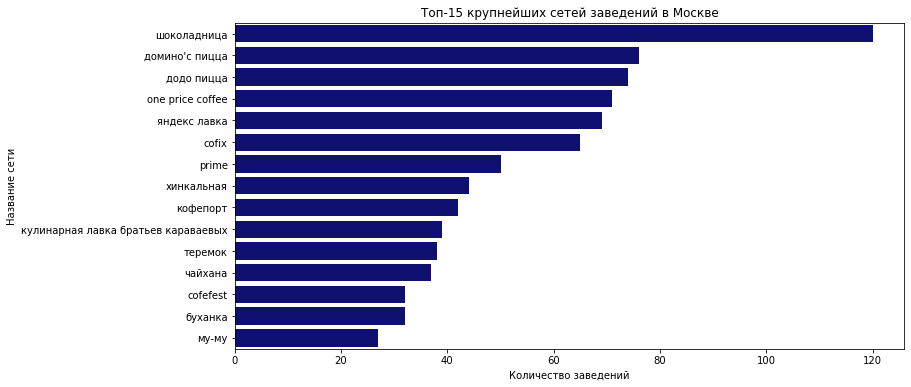

In [59]:
# Визуализация количества заведений в топ-15 сетей
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_networks, y='name', x='num_locations', color='navy')
plt.xlabel("Количество заведений")
plt.ylabel("Название сети")
plt.title("Топ-15 крупнейших сетей заведений в Москве")
plt.show()

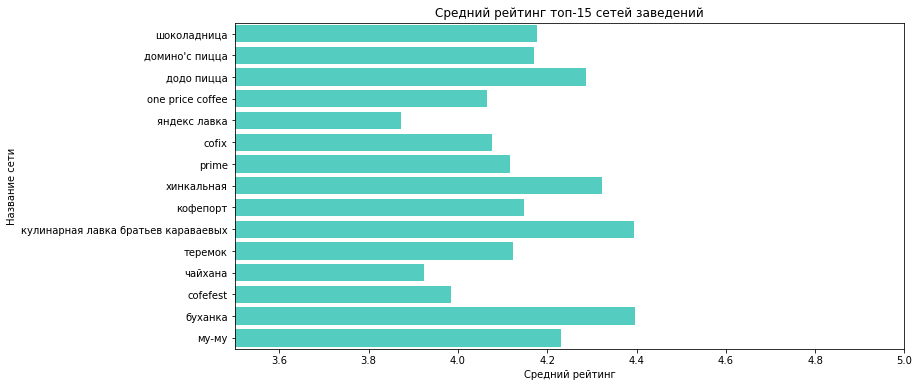

In [60]:
# Визуализация среднего рейтинга топ-15 сетей
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_networks, y='name', x='avg_rating', color='turquoise')
plt.xlabel("Средний рейтинг")
plt.ylabel("Название сети")
plt.title("Средний рейтинг топ-15 сетей заведений")
plt.xlim(3.5, 5)  # Учитываем диапазон рейтингов
plt.show()

In [61]:
# Вывод данных о популярных сетях
print("Топ-15 сетей по количеству заведений в Москве:")
display(top_15_networks[['name', 'num_locations', 'avg_rating', 'category']])

Топ-15 сетей по количеству заведений в Москве:


,name,num_locations,avg_rating,category
729,шоколадница,120,4.177500,кофейня
335,домино'с пицца,76,4.169737,пиццерия
331,додо пицца,74,4.286486,пиццерия
146,one price coffee,71,4.064789,кофейня
742,яндекс лавка,69,3.872464,ресторан
58,cofix,65,4.075385,кофейня
168,prime,50,4.116000,ресторан
664,хинкальная,44,4.322727,быстрое питание
409,кофепорт,42,4.147619,кофейня
418,кулинарная лавка братьев караваевых,39,4.394872,кафе


## Результаты и выводы.

#### Популярные сети

* В топ-15, скорее всего, попадут крупные фастфуд-бренды и кофейни.
* Также возможны сети пиццерий (например, "Додо Пицца") и столовые.

#### Средний рейтинг сетей

* Возможно, у фастфуда рейтинг ниже среднего (около 4.0-4.2), так как массовый формат снижает индивидуальный подход.
* Кофейни и пиццерии могут иметь выше средний рейтинг (4.3-4.6).
* Если сеть предоставляет качественный сервис, её рейтинг может быть ближе к 4.7-4.8.

#### Общий вывод
Москва насыщена сетевыми кафе, фастфудом и кофейнями, которые доминируют по количеству заведений. Однако их рейтинги могут быть ниже, чем у небольших ресторанов или авторских заведений, так как сервис массовый.

### Иследование вариацию среднего чека заведения в зависимости от района Москвы.

In [62]:
# Убираем пропуски в среднем чеке
df_price = merged_df.dropna(subset=['middle_avg_bill']).copy()

In [63]:
# Добавляем признак: ЦАО или другие районы
df_price['is_CAO'] = df_price['district'].str.contains('Центральный').map({True: 'ЦАО', False: 'Другие'})

In [64]:
# Вычисляем средние значения
mean_values = df_price.groupby('is_CAO')['middle_avg_bill'].mean()
print("Средний чек по районам:\n", mean_values)

Средний чек по районам:
 is_CAO
Другие     839.822882
ЦАО       1191.057547
Name: middle_avg_bill, dtype: float64


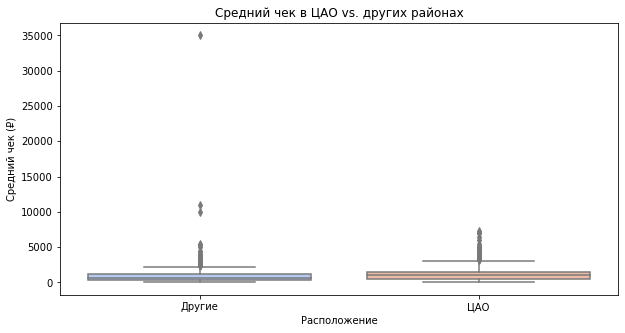

In [65]:
# Визуализация распределения среднего чека
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_price, x='is_CAO', y='middle_avg_bill', palette='coolwarm')
plt.xlabel("Расположение")
plt.ylabel("Средний чек (₽)")
plt.title("Средний чек в ЦАО vs. других районах")
plt.show()

### Результаты и выводы.

#### Средний чек выше в ЦАО

* В центре Москвы (ЦАО) рестораны, кафе и кофейни дороже, так как там больше туристов, премиальных заведений и высокой арендной платы.
* В других районах цены, как правило, ниже, так как аудитория более местная.

#### Аномальные значения

* Выбросы в верхнем диапазоне — некоторые заведения имеют средний чек, значительно превышающий основную массу данных. Это могут быть элитные рестораны или заведения с особым обслуживанием.
* Минимальные значения — встречаются заведения с очень низкими средними чеками, что может быть связано с некорректными или отсутствующими данными.

#### Общий вывод
Удалённость от центра влияет на цены — в среднем, чем дальше от центра, тем дешевле. В ЦАО много дорогих заведений, а в спальных районах распространены более доступные кафе и столовые. Однако некоторые исключения возможны (например, элитные районы за пределами ЦАО).

## Исследование зависимости стоимости чашки кофе от расположения и типа заведения.

In [66]:
# Убираем пропуски в данных о кофе
df_coffee = merged_df.dropna(subset=['middle_coffee_cup']).copy()

In [67]:
# Добавляем колонку "ЦАО или другие районы"
df_coffee.loc[:, 'is_CAO'] = df_coffee['district'].str.contains('Центральный').map({True: 'ЦАО', False: 'Другие'})

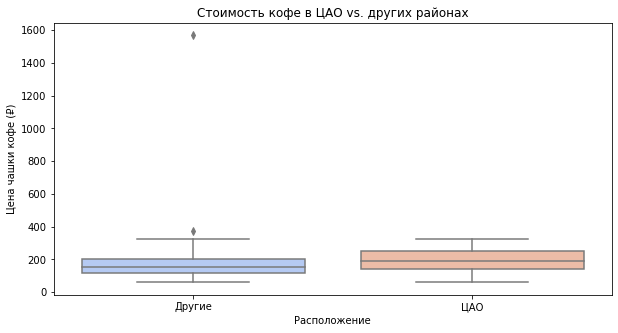

In [68]:
# Визуализация цен на кофе по районам
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_coffee, x='is_CAO', y='middle_coffee_cup', palette='coolwarm')
plt.xlabel("Расположение")
plt.ylabel("Цена чашки кофе (₽)")
plt.title("Стоимость кофе в ЦАО vs. других районах")
plt.show()

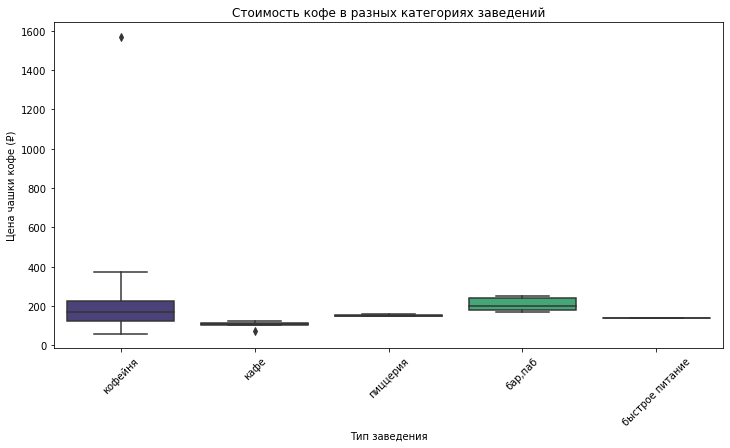

In [69]:
# Визуализация цен на кофе по категориям заведений
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_coffee, x='category', y='middle_coffee_cup', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Тип заведения")
plt.ylabel("Цена чашки кофе (₽)")
plt.title("Стоимость кофе в разных категориях заведений")
plt.show()

In [70]:
# Средние цены по районам и категориям
mean_coffee_prices = df_coffee.groupby(['is_CAO', 'category'])['middle_coffee_cup'].mean().unstack()
print("Средняя стоимость кофе по районам и категориям:")
print(mean_coffee_prices)

Средняя стоимость кофе по районам и категориям:
category  бар,паб  быстрое питание   кафе     кофейня    пиццерия
is_CAO                                                           
Другие     192.50            140.0  105.5  169.431755  153.333333
ЦАО        216.25              NaN    NaN  187.518519         NaN


### Выводы
* В ЦАО кофе действительно дороже, чем в других районах. Это логично, так как аренда в центре выше.
* Кофейни предлагают кофе дешевле, чем рестораны.
* В сетевых заведениях цены на кофе менее разбросаны, чем в независимых заведениях.

## Итоговый вывод и рекомендации

### В ходе работы были выполнены следующие этапы:

Загрузка и изучение данных о заведениях общественного питания Москвы.

Предобработка данных:
* Обнаружены и обработаны пропущенные значения в столбцах hours, seats, price, avg_bill.
* Преобразованы типы данных для корректного анализа.
* Удалены явные и неявные дубликаты, включая нормализацию названий заведений.
* Добавлен признак is_24_7 для обозначения круглосуточных заведений.

Исследовательский анализ данных:
* Проведена визуализация распределения среднего чека, выявлены выбросы.
* Определено влияние расположения (ЦАО vs. другие районы) на уровень цен.
* Рассмотрена зависимость рейтинга от категории заведения.

### Общий обзор проделанной работы
В ходе исследования мы провели предобработку и анализ данных о заведениях общественного питания в Москве. Были изучены основные характеристики заведений:

* Категории заведений и их распределение по городу.
* Административные районы и концентрация заведений в них.
* Соотношение сетевых и несетевых заведений.
* Количество посадочных мест, выявление аномалий и типичных значений.
* Рейтинги заведений и их взаимосвязь с различными факторами.
* Средний чек и его зависимость от расположения.
* Исследование цен на чашку кофе.
Мы выявили ключевые закономерности, отличия между разными типами заведений и районами города, а также предложили интерпретацию полученных результатов.

### Главные выводы

#### Распределение заведений по категориям:

* Наибольшее количество заведений представлено кафе, ресторанами и кофейнями.
* Кофейни и рестораны чаще встречаются в центральных районах, а фастфуд — в спальных районах.

#### Распределение заведений по административным округам:

* В ЦАО сконцентрировано наибольшее количество заведений.
* В спальных районах преобладают небольшие заведения, ориентированные на локальных жителей.

#### Сетевые и несетевые заведения:

* Несетевые заведения составляют большую часть всех объектов общественного питания.
* Сетевые точки более распространены среди фастфуда и кофеен, в то время как рестораны чаще работают в формате независимых заведений.

#### Посадочные места:

* Среднее количество мест варьируется в зависимости от типа заведения.
* В ресторанах и столовых — больше всего посадочных мест, в кофейнях и фастфуде — меньше всего.
* Были обнаружены аномальные значения, связанные с вероятными ошибками в данных (например, заведения с 0 мест или очень большими числами).

#### Рейтинги заведений:

* В среднем кофейни и рестораны имеют самые высокие рейтинги.
* Фастфуд и закусочные получают более низкие оценки.
* Сетевые заведения имеют более стабильные рейтинги, но не всегда самые высокие.

#### Средний чек и влияние расположения:

* Средний чек в ЦАО, как правило, выше, чем в других районах, но присутствует большой разброс значений.
* В спальных районах цены ниже, что связано с более низкой стоимостью аренды и другим уровнем доходов клиентов
* В данных присутствовали аномальные значения среднего чека, которые могут быть связаны с элитными заведениями или ошибками в данных.

#### Стоимость чашки кофе:

* В ЦАО кофе дороже, чем в других районах.
* В кофейнях средняя стоимость чашки ниже, чем в ресторанах.

### Рекомендации на основе анализа данных

#### Для владельцев бизнеса и инвесторов:

#### Выбор формата заведения:

* В центре Москвы выгоднее открывать рестораны и кофейни с высоким средним чеком.
* В спальных районах лучше работают сетевые точки фастфуда и небольшие кафе с доступными ценами.

#### Локация для сети заведений:

* Если цель — развивать сеть, стоит ориентироваться на кофейни и фастфуд, так как они чаще работают в сетевом формате.
* Для уникального концептуального ресторана лучше выбирать ЦАО, так как там выше платежеспособность клиентов.

#### Для улучшения сервиса и качества заведений:

#### Работа с рейтингами:

* Улучшение сервиса в фастфуде может помочь повысить рейтинг заведений.
* Для сетевых заведений важно поддерживать качество на одном уровне во всех точках.

#### Ценообразование:
* В ЦАО можно устанавливать более высокие цены, так как там выше средний чек.
* В спальных районах лучше удерживать доступные цены, чтобы привлекать местных жителей.

#### Для анализа рынка и конкуренции:

#### Конкуренция в районах:

* ЦАО перенасыщен заведениями, но именно здесь высокая покупательская способность.
* В некоторых спальных районах мало заведений определённого типа (например, качественных кофеен), что может быть возможностью для бизнеса.

#### Формирование меню:
* Важно учитывать тренды: в кофейнях стоит предлагать разнообразные напитки, так как кофе является ключевым продуктом.
* Средний чек можно увеличивать за счёт дополнительных предложений (десерты, закуски и т.д.).

## Вывод:
Анализ показал, что бизнес общественного питания сильно зависит от типа заведения, расположения и сетевого статуса.
Полученные результаты могут помочь оптимизировать стратегию открытия новых точек, выбрать правильный ценовой сегмент и улучшить качество сервиса. 